# import data

In [1]:
import pandas as pd
import numpy as np
import glob

In [3]:
n=0
list_data=[]
for name in glob.glob('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/targted file new/*.csv'):
    n=n+1
    data_i=pd.read_csv(name)
#     print(n,name)
    list_data.append(data_i)
    
    
    
    

/Users/yoga/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
all_data=pd.concat(list_data)

In [17]:
all_data[1:2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
1,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1477,1477,1,Bachelor's degree (for example:,January,2011


In [18]:
# all_data.to_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/targted file new/new_combine all data.csv',index=0)

# process the data

In [19]:
#filter age between 16 and 64
# wave11age=wave11.loc[(wave11['tage'].astype(int)<65) and (wave11['tage'].astype(int)>15)]
# wave11age
all_data2=all_data[all_data['tage']!='Less than 1 full year old']
all_data2['tage'] = all_data2['tage'].astype(int)

all_data2age = all_data2.loc[(all_data2['tage'] >= 16) & (all_data2['tage'] <= 64)]

<ipython-input-19-dc5ab34e5ae1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2['tage'] = all_data2['tage'].astype(int)


In [20]:
all_data2age[1:2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
1,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1477,1477,1,Bachelor's degree (for example:,January,2011


In [21]:
#filter wage
filterwage=all_data2age[all_data2age['tpyrate1']!='Not in universe or none']
filterwage


,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
16,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1228,1228,0,Bachelor's degree (for example:,January,2011
17,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1466,1466,1,Bachelor's degree (for example:,October,2010
18,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1220,1220,0,Bachelor's degree (for example:,November,2010
19,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1222,1222,0,Bachelor's degree (for example:,December,2010
29,19128000932,18,10,Louisiana,Not in Universe,Yes,All weeks 1-34 hours,20,Not in Universe,Not in Universe,8799,10584,1923,1923,2,11th Grade,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309394,955925986857,59,14.86999999999999922,New York,Not in Universe,Yes,At least 1 week but not all weeks,30,Not in Universe,Not in Universe,3112,3134,1280,1280,0,Associate (2-yr) college degree,June,2012
309415,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,994,994,0,Bachelor's degree (for example:,March,2012
309416,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,996,996,0,Bachelor's degree (for example:,May,2012
309417,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,995,995,0,Bachelor's degree (for example:,June,2012


## aim to create figure 1

In [23]:
# seperate the group by wage 
wave1_filterwage=filterwage.copy()
# wave1_filterwage.iloc[1]['tpyrate1']
wave1_filterwage['tpyrate1'] =wave1_filterwage['tpyrate1'] .astype(float)
wave1_filterwage75=wave1_filterwage[wave1_filterwage['tpyrate1']<7.5]
wave1_filterwage849=wave1_filterwage[(wave1_filterwage['tpyrate1']<8.5)&(wave1_filterwage['tpyrate1']>=7.5)]
wave1_filterwage999=wave1_filterwage[(wave1_filterwage['tpyrate1']<10)&(wave1_filterwage['tpyrate1']>=8.5)]


### read the state data, bounded or not bounded

In [24]:
#next seperate into bounded and unbounded state

state=pd.read_csv('/Users/yoga/Dropbox/0 FSU/4_2022 fall/2_applied economics/3 replication of a paper eco/1_4_2008minimum_wage_by_states_clean.csv')


In [27]:
state2=state[['State','bounded']]
state_bounded=state2[state2['bounded']==1]
state_bounded_list=state_bounded['State'].tolist()


### seperate bounded state and not bounded state 

In [28]:
#filter  bounded
wave1_filterwage75_bounded=wave1_filterwage75[wave1_filterwage75['tfipsst'].isin(state_bounded_list)]
wave1_filterwage849_bounded=wave1_filterwage849[wave1_filterwage849['tfipsst'].isin(state_bounded_list)]
wave1_filterwage999_bounded=wave1_filterwage999[wave1_filterwage999['tfipsst'].isin(state_bounded_list)]


In [29]:
#fiter not bounded data
wave1_filterwage75_nobounded=wave1_filterwage75[~wave1_filterwage75['tfipsst'].isin(state_bounded_list)]
wave1_filterwage849_nobounded=wave1_filterwage849[~wave1_filterwage849['tfipsst'].isin(state_bounded_list)]
wave1_filterwage999_nobounded=wave1_filterwage999[~wave1_filterwage999['tfipsst'].isin(state_bounded_list)]

In [37]:
#save the data of six groups 5.15-7.25 group

group_list=[wave1_filterwage75_nobounded,wave1_filterwage75_bounded,wave1_filterwage849_nobounded,
           wave1_filterwage849_bounded,wave1_filterwage999_nobounded,wave1_filterwage999_bounded]

targe_group725=[]
target_name=['filterwage75_nobounded725','filterwage75_bounded725',
            'filterwage849_nobounded725','filterwage849_bounded725',
            'filterwage999_nobounded725','filterwage999_bounded725',]

for i in range(len(group_list)):
    groupi=group_list[i]
#     namei=target_name[i]
    update725=groupi[(groupi['tpyrate1']>=5.15)&(groupi['tpyrate1']<=7.25)]
#     update725.to_csv(str(i)+namei+".csv",index=0)
    targe_group725.append(update725)

    



In [36]:
wave1_filterwage75_nobounded

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
856,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1879,1879,1,"Some college, but no degree",October,2010
857,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1883,1883,1,"Some college, but no degree",December,2010
858,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1880,1880,1,"Some college, but no degree",November,2010
859,19344123268,59,4.19,Florida,Not in Universe,No,All weeks 35+,55,Not in Universe,Not in Universe,5700,7097,1892,1892,1,"Some college, but no degree",January,2011
1098,19344246159,17,7.00,Florida,Not in Universe,No,All weeks 1-34 hours,10,Not in Universe,Not in Universe,10130,10264,1466,1466,1,10th Grade,October,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308886,955925944720,16,7.25,New York,Not in Universe,No,"Did not work (did not have a job,",12,Not in Universe,Not in Universe,8766,8771,2009,2009,2,11th Grade,April,2012
309051,955925975196,23,2.65,Michigan,Not in Universe,Yes,All weeks 1-34 hours,25,Not in Universe,Not in Universe,1600,1602,996,996,0,"Some college, but no degree",May,2012
309052,955925975196,23,2.65,Michigan,Not in Universe,Yes,All weeks 1-34 hours,25,Not in Universe,Not in Universe,2400,2402,997,997,0,"Some college, but no degree",April,2012
309053,955925975196,23,2.65,Michigan,Not in Universe,Yes,At least 1 week but not all weeks,25,Not in Universe,Not in Universe,1500,1502,995,995,0,"Some college, but no degree",June,2012


In [45]:
len(targe_group725[0])

21116

In [47]:
targe_group725[0]['tage'].mean()

27.722580034097366

In [52]:
more_high_school=['Some college, but no degree',
                  'High School Graduate - (diploma',
                  "Bachelor's degree (for example:",
                  'Associate (2-yr) college degree',
                  "Master's degree (For example: MA,",
                  'Professional School degree (for',
                  'Doctorate degree (for example:' 
                 ]

In [53]:
highschool_more=group_list[0][group_list[0]['eeducate'].isin(more_high_school)]

In [55]:
len(highschool_more)

22477

In [57]:
len(group_list[0])

33807

In [51]:
group_list[0]['eeducate'].unique().tolist()

['Some college, but no degree',
 '10th Grade',
 'High School Graduate - (diploma',
 '12th grade, no diploma',
 "Bachelor's degree (for example:",
 '11th Grade',
 'Associate (2-yr) college degree',
 'Diploma or certificate from a',
 '7th Or 8th Grade',
 '9th Grade',
 '5th Or 6th Grade',
 "Master's degree (For example: MA,",
 'Less Than 1st Grade',
 '1st, 2nd, 3rd or 4th grade',
 'Professional School degree (for',
 'Doctorate degree (for example:']

In [ ]:
more_high_school=['Some college, but no degree',
                  'High School Graduate - (diploma',
                  "Bachelor's degree (for example:",
                  'Associate (2-yr) college degree',
                  "Master's degree (For example: MA,",
                  'Professional School degree (for',
                  'Doctorate degree (for example:' 
                 ]

In [64]:
#calculate the statistics in the table 1
individual=[]
observation=[]
agemean=[]
agestd=[]
childmean=[]
childstd=[]
incomemean=[]
incomestd=[]
hourmean=[]
hourstd=[]
highschoolmean=[]
highschoolstd=[]
wage515_725=[]
employed=[]
df=pd.DataFrame(columns=['number of individuals'])


for i in range(len(group_list)):
    fenmu=group_list[i]
    fenzi=targe_group725[i]
    individual_i=fenzi['ssuid'].nunique()
    individual.append(individual_i)
    
#     observation_i=len(fenzi)
#     observation.append(observation_i)
    
#     agei=fenzi['tage'].mean()
#     agemean.append(agei)
#     agestdi=fenzi['tage'].std()
#     agestd.append(agestdi)
    
#     childi=fenzi['rfownkid'].mean()
#     childmean.append(childi)
#     child_stdi=fenzi['rfownkid'].std()
#     childstd.append(child_stdi)
    
#     incomei= fenzi['thtotinc'].mean()
#     incomemean.append(incomei)
#     incomestdi= fenzi['thtotinc'].std()
#     incomestd.append(incomestdi)
    
#     houri= fenzi['ehrsall'].mean()
#     hourmean.append(houri)

#     houristdi=fenzi['ehrsall'].std()
#     houristd.append(houristdi)
    
#     highschool_more=fenzi[group_list['eeducate'].isin(more_high_school)]
#     number_highschool=len(highschool_more)
#     percentage_highschool=number_highschool/observation_i
#     highschoolmean.append(percentage_highschool)
    
    df = df.append({'number of individuals': individual_i},ignore_index=True)
    
    
    
    
    
    
    
    
    
    
    



In [68]:
targe_group725[3]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr


In [66]:
group_list[2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
588,19228740089,31,7.50,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2300,2300,0,High School Graduate - (diploma,November,2010
589,19228740089,31,7.50,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2315,2315,0,High School Graduate - (diploma,January,2011
590,19228740089,31,7.50,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2304,2304,0,High School Graduate - (diploma,December,2010
591,19228740089,31,7.50,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2299,2299,0,High School Graduate - (diploma,October,2010
596,19228740089,26,8.00,Florida,Not in Universe,No,All weeks 35+,35,Not in Universe,Not in Universe,3524,3524,2300,2300,0,High School Graduate - (diploma,November,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308726,955925944023,21,7.65,Michigan,Not in Universe,Yes,"Did not work (did not have a job,",40,Not in Universe,Not in Universe,177,4477,2418,2418,2,Associate (2-yr) college degree,April,2012
309287,955925986138,21,7.80,Michigan,Not in Universe,No,All weeks 1-34 hours,18,Not in Universe,Not in Universe,12503,12847,2009,2009,2,"Some college, but no degree",April,2012
309288,955925986138,22,7.80,Michigan,Not in Universe,No,All weeks 1-34 hours,18,Not in Universe,Not in Universe,12503,12847,2004,2004,2,"Some college, but no degree",June,2012
309289,955925986138,21,7.80,Michigan,Not in Universe,No,All weeks 1-34 hours,18,Not in Universe,Not in Universe,12503,12847,2003,2003,2,"Some college, but no degree",March,2012


In [74]:
df=pd.DataFrame()
for i in range(len(group_list)):
    fenmu=group_list[i]
    fenzi=targe_group725[i]
    individual_i=fenzi['ssuid'].nunique()
    print(individual_i)
#     individual.append(individual_i)
    df = df.append({'number of individuals': individual_i},ignore_index=True)
   

1936
2963
0
0
0
0


In [75]:
targe_group725[2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr


## read in the combined data

In [4]:
combine=pd.read_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/targted file new/new_combine all data.csv')

In [5]:
combine

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
0,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1467,1467,1,Bachelor's degree (for example:,November,2010
1,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1477,1477,1,Bachelor's degree (for example:,January,2011
2,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1466,1466,1,Bachelor's degree (for example:,October,2010
3,19128000276,31,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1470,1470,1,Bachelor's degree (for example:,December,2010
4,19128000276,34,Not in universe or none,Florida,Not in Universe,Not in Universe,"Did not work (did not have a job,",Not in Universe,Not in Universe,Not in Universe,0,252,1477,1477,1,Bachelor's degree (for example:,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221114,955958398688,5,Not in universe or none,California,Not in Universe,Not in Universe,Not in Universe,Not in Universe,Not in Universe,Not in Universe,10000,10263,2284,2284,3,Not in Universe,May,2012
4221115,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,994,994,0,Bachelor's degree (for example:,March,2012
4221116,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,996,996,0,Bachelor's degree (for example:,May,2012
4221117,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,995,995,0,Bachelor's degree (for example:,June,2012


In [6]:
#filter age between 16 and 64
# wave11age=wave11.loc[(wave11['tage'].astype(int)<65) and (wave11['tage'].astype(int)>15)]
# wave11age
all_data=combine.copy()

all_data2=all_data[all_data['tage']!='Less than 1 full year old']
all_data2['tage'] = all_data2['tage'].astype(int)

all_data2age = all_data2.loc[(all_data2['tage'] >= 16) & (all_data2['tage'] <= 64)]

<ipython-input-6-2ac59e4d2ba3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data2['tage'] = all_data2['tage'].astype(int)


In [7]:
#filter wage
filterwage=all_data2age[all_data2age['tpyrate1']!='Not in universe or none']
filterwage

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
16,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1228,1228,0,Bachelor's degree (for example:,January,2011
17,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1466,1466,1,Bachelor's degree (for example:,October,2010
18,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1220,1220,0,Bachelor's degree (for example:,November,2010
19,19128000334,25,10,New York,Not in Universe,No,All weeks 35+,40,Not in Universe,Not in Universe,5000,5002,1222,1222,0,Bachelor's degree (for example:,December,2010
29,19128000932,18,10,Louisiana,Not in Universe,Yes,All weeks 1-34 hours,20,Not in Universe,Not in Universe,8799,10584,1923,1923,2,11th Grade,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221094,955925986857,59,14.86999999999999922,New York,Not in Universe,Yes,At least 1 week but not all weeks,30,Not in Universe,Not in Universe,3112,3134,1280,1280,0,Associate (2-yr) college degree,June,2012
4221115,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,994,994,0,Bachelor's degree (for example:,March,2012
4221116,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,996,996,0,Bachelor's degree (for example:,May,2012
4221117,955958986671,22,9.269999999999999574,California,Not in Universe,No,All weeks 1-34 hours,20,Not in Universe,Not in Universe,0,0,995,995,0,Bachelor's degree (for example:,June,2012


In [8]:
# filterwage.to_csv('/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/useful data after processing/age_16_64_with_wage_info.csv')

In [9]:
# seperate the group by wage 
wave1_filterwage=filterwage.copy()
# wave1_filterwage.iloc[1]['tpyrate1']
wave1_filterwage['tpyrate1'] =wave1_filterwage['tpyrate1'] .astype(float)
wave1_filterwage75=wave1_filterwage[wave1_filterwage['tpyrate1']<7.5]
wave1_filterwage849=wave1_filterwage[(wave1_filterwage['tpyrate1']<8.5)&(wave1_filterwage['tpyrate1']>=7.5)]
wave1_filterwage999=wave1_filterwage[(wave1_filterwage['tpyrate1']<10)&(wave1_filterwage['tpyrate1']>=8.5)]


In [10]:
#next seperate into bounded and unbounded state

state=pd.read_csv('/Users/yoga/Dropbox/0 FSU/4_2022 fall/2_applied economics/3 replication of a paper eco/1_4_2008minimum_wage_by_states_clean.csv')


In [11]:
state2=state[['State','bounded']]
state_bounded=state2[state2['bounded']==1]
state_bounded_list=state_bounded['State'].tolist()

In [12]:
#filter  bounded
wave1_filterwage75_bounded=wave1_filterwage75[wave1_filterwage75['tfipsst'].isin(state_bounded_list)]
wave1_filterwage849_bounded=wave1_filterwage849[wave1_filterwage849['tfipsst'].isin(state_bounded_list)]
wave1_filterwage999_bounded=wave1_filterwage999[wave1_filterwage999['tfipsst'].isin(state_bounded_list)]

In [13]:
#fiter not bounded data
wave1_filterwage75_nobounded=wave1_filterwage75[~wave1_filterwage75['tfipsst'].isin(state_bounded_list)]
wave1_filterwage849_nobounded=wave1_filterwage849[~wave1_filterwage849['tfipsst'].isin(state_bounded_list)]
wave1_filterwage999_nobounded=wave1_filterwage999[~wave1_filterwage999['tfipsst'].isin(state_bounded_list)]

In [14]:
#save the data of six groups 5.15-7.25 group

group_list=[wave1_filterwage75_nobounded,wave1_filterwage75_bounded,wave1_filterwage849_nobounded,
           wave1_filterwage849_bounded,wave1_filterwage999_nobounded,wave1_filterwage999_bounded]

targe_group725=[]
target_name=['filterwage75_nobounded725','filterwage75_bounded725',
            'filterwage849_nobounded725','filterwage849_bounded725',
            'filterwage999_nobounded725','filterwage999_bounded725',]

for i in range(len(group_list)):
    groupi=group_list[i]
    namei=target_name[i]
    update725=groupi[(groupi['tpyrate1']>=5.15)&(groupi['tpyrate1']<=7.25)]
#     update725.to_csv(str(i)+namei+".csv",index=0)
    targe_group725.append(update725)

#data is relocated at /Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage/SIPP/useful data after processing

In [16]:
# pwd

In [34]:
targe_group725[1][1:2]

,ssuid,tage,tpyrate1,tfipsst,euectyp5,eawop,rmhrswk,ehrsall,ehrsbs1,ehrsbs2,thearn,thtotinc,rhpov,rfpov,rfownkid,eeducate,rhcalmn,rhcalyr
9726,66133881995,18,7.25,South Dakota,Not in Universe,No,All weeks 1-34 hours,10,Not in Universe,Not in Universe,31478,32307,2326,2326,4,11th Grade,February,2011


In [27]:
#bound 
str(targe_group725[0]['tage'].mean())

'27.722580034097366'

In [28]:
str(targe_group725[0]['tage'].std())

'12.831561243733377'

In [29]:
#not bound
str(targe_group725[1]['tage'].std())

'13.349921549080948'

In [30]:
#not bound 
str(targe_group725[1]['tage'].mean())

'29.146163247954085'

In [31]:
 
more_high_school=['Some college, but no degree',
                  'High School Graduate - (diploma',
                  "Bachelor's degree (for example:",
                  'Associate (2-yr) college degree',
                  "Master's degree (For example: MA,",
                  'Professional School degree (for',
                  'Doctorate degree (for example:' 
                 ]

In [32]:
group1=targe_group725[0]
group2=targe_group725[1]

In [37]:
group1['rfownkid'].mean()
group1['rfownkid'].std()

1.4112639696196034

In [39]:
group2['rfownkid'].mean()
group2['rfownkid'].std()


1.296618565567694

In [42]:
group2['thearn'].mean()

3954.357025188649

In [43]:
group2['thearn'].std()

4265.093110399709

In [45]:
len(group2)/len(group_list[1])

0.7814297282146045

In [47]:
group2['tpyrate1'].std()

0.45605147834100057

In [49]:
# print('SORTED DATAFRAME')
# df.sort_values(by = ['Rank', 'Age'], ascending = [True, False], na_position = 'first')

group1=group1.sort_values(by = ['rhcalyr', 'rhcalmn'], ascending = [True, True], na_position = 'first')


In [52]:
group1wage=group1[['tpyrate1','rhcalmn', 'rhcalyr']]

In [51]:
group1.columns

Index(['ssuid', 'tage', 'tpyrate1', 'tfipsst', 'euectyp5', 'eawop', 'rmhrswk',
       'ehrsall', 'ehrsbs1', 'ehrsbs2', 'thearn', 'thtotinc', 'rhpov', 'rfpov',
       'rfownkid', 'eeducate', 'rhcalmn', 'rhcalyr'],
      dtype='object')

In [58]:
wage1=group1wage.groupby([ 'rhcalyr','rhcalmn']).mean()


In [59]:
group2wage=group2[['tpyrate1','rhcalmn', 'rhcalyr']]

wage2=group2wage.groupby([ 'rhcalyr','rhcalmn']).mean()


In [66]:
wage1=wage1.rename(columns={'tpyrate1':'no bound wage'})

In [67]:
wage2=wage2.rename(columns={'tpyrate1':'bound wage'})

In [72]:
wage3=wage1.merge(wage2,left_on=['rhcalyr','rhcalmn'],right_on=['rhcalyr','rhcalmn'],how='left')

In [74]:
#wage3.to_csv('wage for figure2.csv')

In [76]:
wage3

no bound wage  bound wage
rhcalyr rhcalmn                             
2008    August          6.872124    6.650235
        December        6.898884    6.691538
        July            6.858554    6.641816
        June            6.869260    6.636166
        May             6.846911    6.611375
        November        6.890269    6.679517
        October         6.890857    6.665828
        September       6.880781    6.661833
2009    April           6.953387    6.731586
        August          6.973553    6.930079
        December        6.992466    7.019866
        February        6.903829    6.698270
        January         6.905233    6.692952
        July            6.977707    6.883747
        June            6.967551    6.829605
        March           6.938646    6.712545
        May             6.958770    6.780088
        November        7.002641    6.997035
        October         6.992358    6.963680
        September       6.981894    6.946821
2010    April           6.992258    7.047411
        August          7.046619    7.056256
        December        7.068486    7.046678
        February        7.003251    7.033315
        January         7.008683    7.030307
        July            7.031238    7.059154
        June            7.026887    7.058282
        March           6.995326    7.040785
        May             7.004460    7.050068
        November        7.064874    7.046385
        October         7.051628    7.058205
        September       7.056427    7.056845
2011    April           7.066254    7.067599
        August          7.058315    7.078376
        December        7.083444    7.079414
        February        7.053836    7.057658
        January         7.050247    7.047140
        July            7.069582    7.092935
        June            7.086731    7.085338
        March           7.064825    7.053517
        May             7.074528    7.075719
        November        7.074214    7.078057
        October         7.067625    7.063427
        September       7.077407    7.065120
2012    April           7.105714    7.105155
        February        7.097500    7.086344
        January         7.088773    7.090754
        July            7.105909    7.116565
        June            7.092109    7.119283
        March           7.104264    7.100275
        May             7.090155    7.119102

In [77]:
wage4=wage3.copy()
wage4.reset_index(inplace=True)

In [81]:
wage4['rhcalmn'].unique()
month=['August', 'December', 'July', 'June', 'May', 'November', 'October',
       'September', 'April', 'February', 'January', 'March']
month_number=['08','12','07','06','05','11','10','09','04','02','01','03']

In [82]:
month2number={}
for i in range(len(month)):
    month2number[month[i]]=month_number[i]
    
    

In [83]:
month2number

{'August': '08',
 'December': '12',
 'July': '07',
 'June': '06',
 'May': '05',
 'November': '11',
 'October': '10',
 'September': '09',
 'April': '04',
 'February': '02',
 'January': '01',
 'March': '03'}

In [86]:
monthpd=pd.DataFrame.from_dict(month2number,orient='index')

In [92]:
wage5=wage4.merge(monthpd,left_on='rhcalmn',right_index=True,how='left')

In [94]:
wage6=wage5.copy()

In [101]:
for i in range(len(wage6)):
    wage6['time'][i]=str(wage6['rhcalyr'][i])+'-'+wage6[0][i]

<ipython-input-101-86c6da04533d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage6['time'][i]=str(wage6['rhcalyr'][i])+'-'+wage6[0][i]


In [111]:
wage6=wage6.sort_values(by='time',ascending=True)
wage6=wage6.reset_index(drop=True)

In [100]:
wage6['rhcalyr'][0]

2008

In [114]:
# wage6.to_csv('wage for figure 2 after processing the data and clean.csv')

In [115]:
wage6

,index,rhcalyr,rhcalmn,no bound wage,bound wage,time,0
0,4,2008,May,6.846911,6.611375,2008-05,05
1,3,2008,June,6.869260,6.636166,2008-06,06
2,2,2008,July,6.858554,6.641816,2008-07,07
3,0,2008,August,6.872124,6.650235,2008-08,08
4,7,2008,September,6.880781,6.661833,2008-09,09
5,6,2008,October,6.890857,6.665828,2008-10,10
6,5,2008,November,6.890269,6.679517,2008-11,11
7,1,2008,December,6.898884,6.691538,2008-12,12
8,12,2009,January,6.905233,6.692952,2009-01,01
9,11,2009,February,6.903829,6.698270,2009-02,02


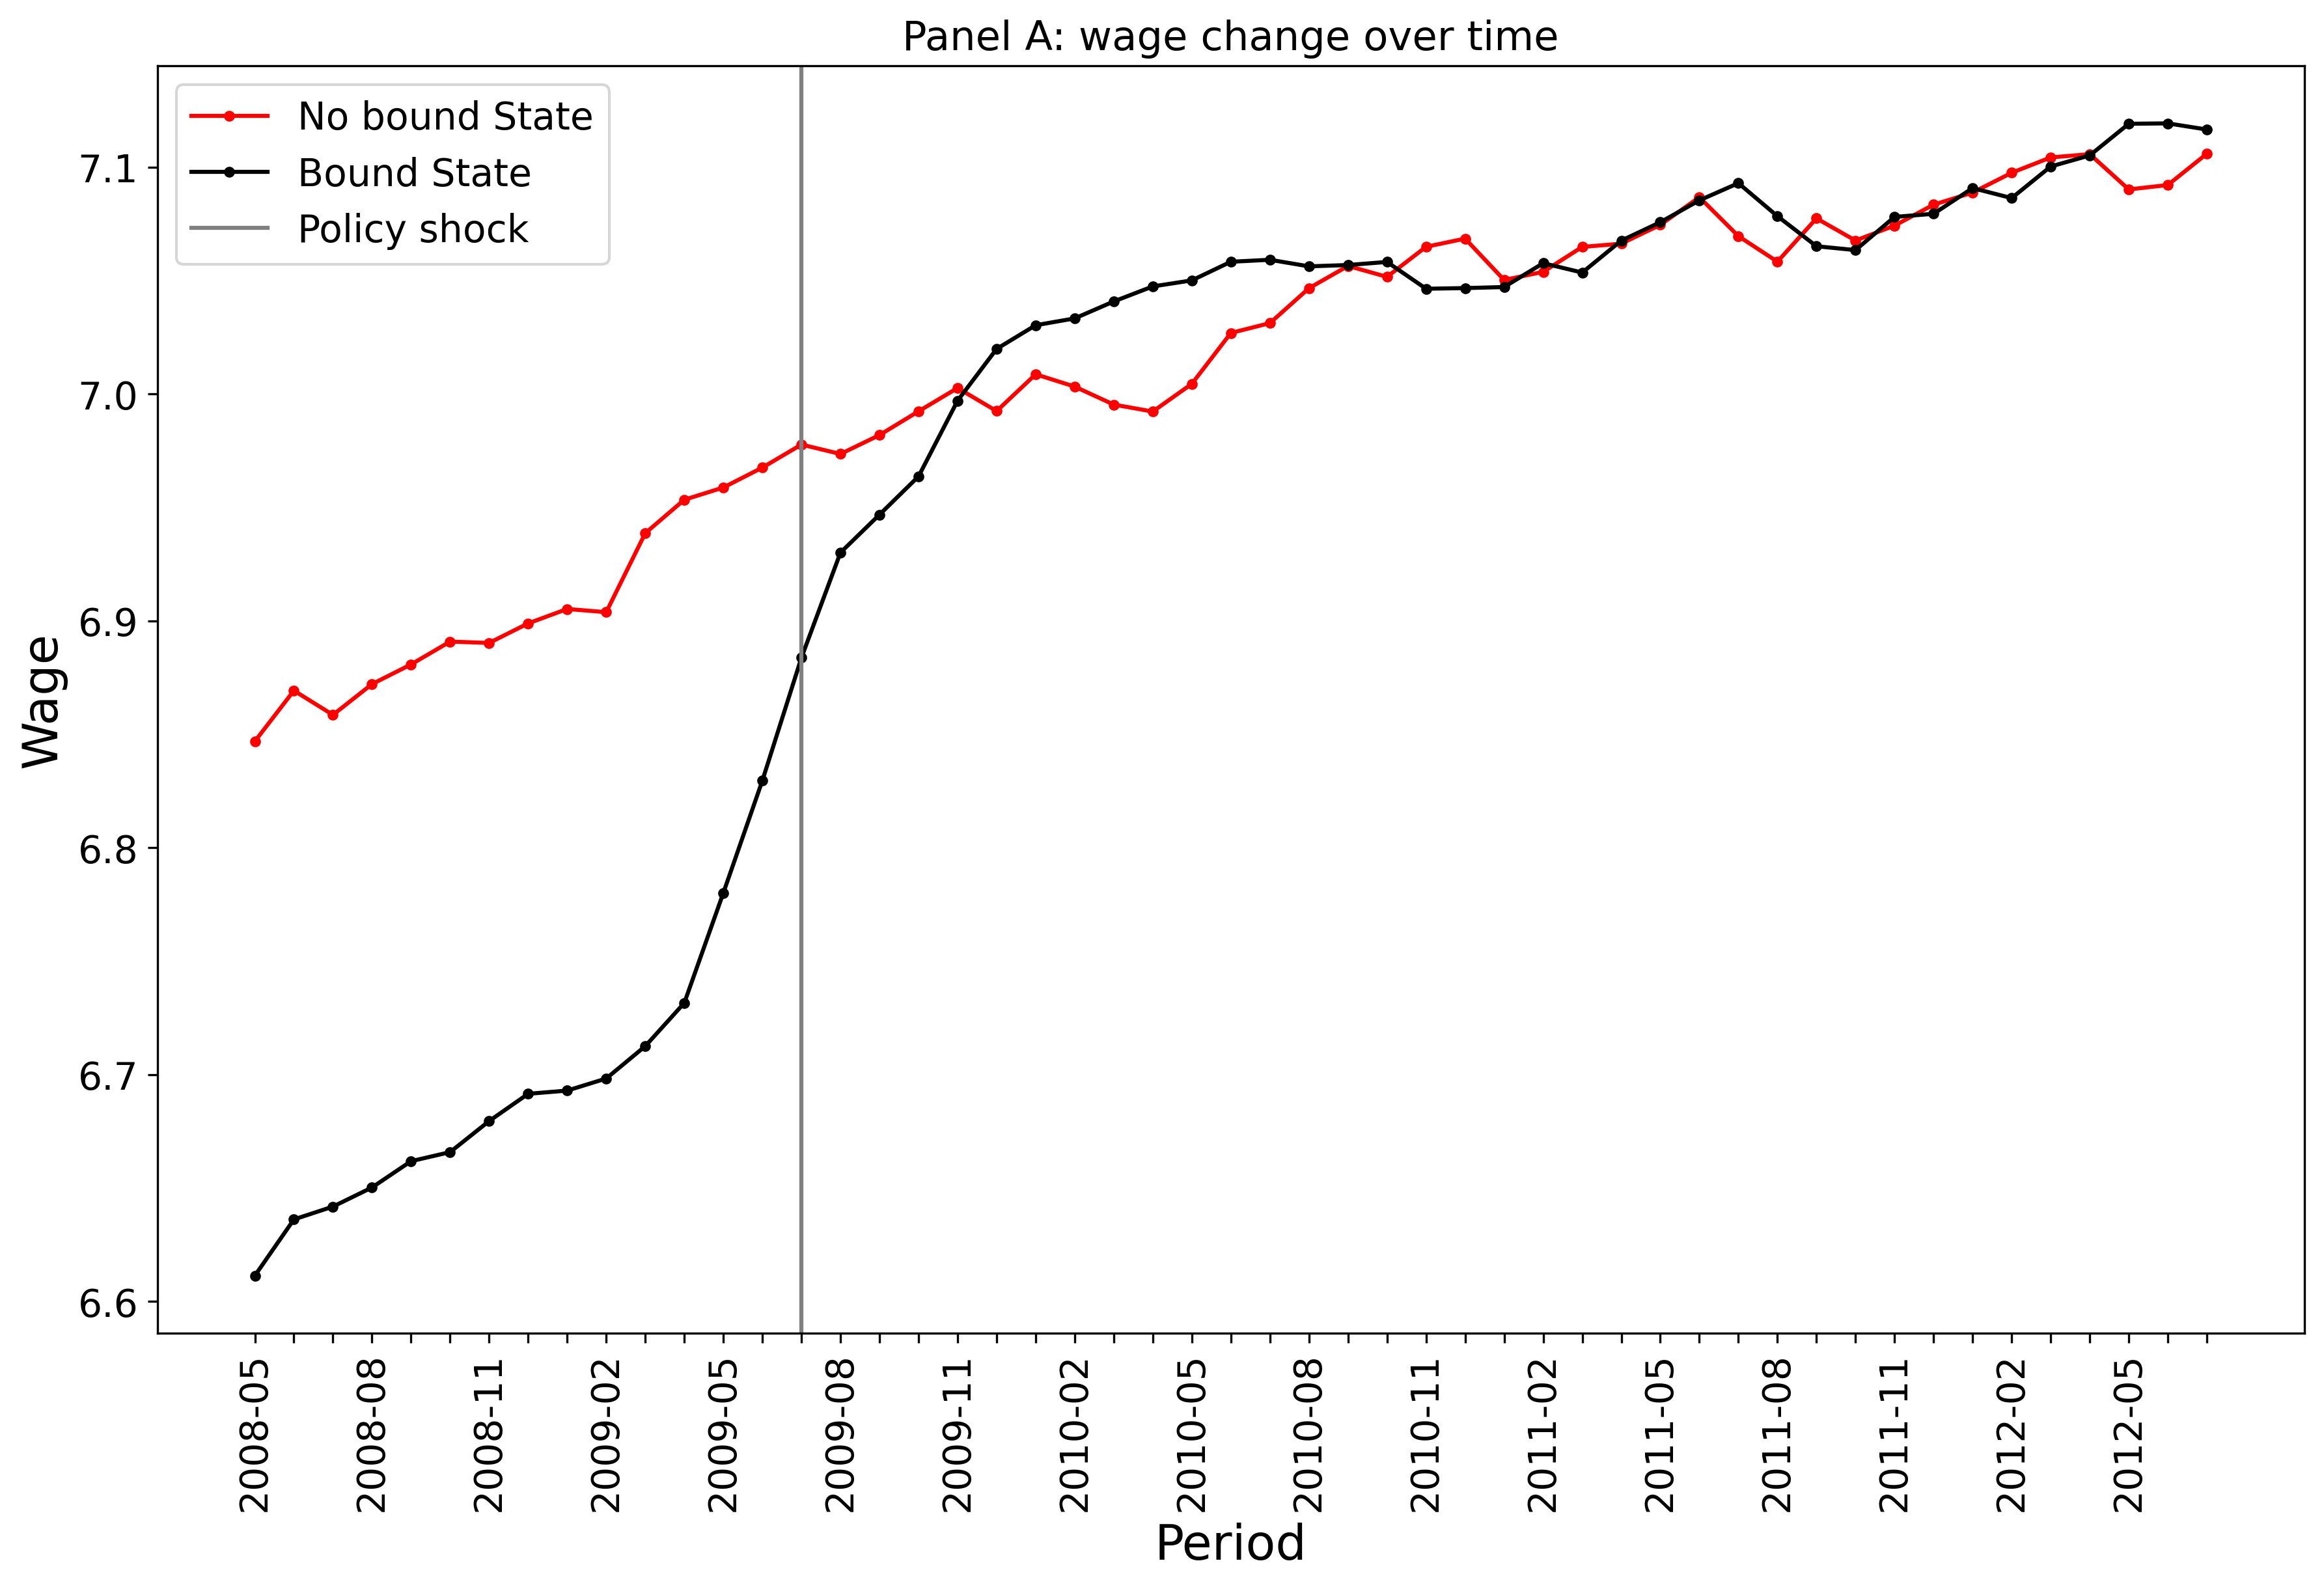

In [148]:

#use the data to draw line graph.
import matplotlib.pyplot as plt

#title = 'Market Sale Price Growth'
# subset_col = data_pd_complete[data_pd_complete['Feature'] == 'Market Sale Price Growth' ]

fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')


subset = wage6.copy()
x = subset['time'].to_list()
y1 = subset['no bound wage'].to_numpy()
y2 = subset['bound wage'].to_numpy()

# plot lines
plt.plot(x, y1, label = "No bound State", color='red',marker='.')
plt.plot(x, y2, label = "Bound State", color='black',marker='.')

plt.axvline(x='2009-07', color='gray', linestyle='-',  label = "Policy shock")




plt.xlabel('Period', fontsize=18)
plt.ylabel('Wage', fontsize=18)
plt.legend(fontsize=14) # using a size in points
#plt.xticks(range(0,len(miami_picture['Period'].tolist()))[::4],miami_picture['Period'].tolist()[::4],fontsize=14, rotation=45)
plt.xticks(fontsize=14, rotation=90)

plt.xticks(np.arange(0,51,1), [x[i] if i in range(0,51,3) else '' for i in range(0,51)])

# plt.locator_params(nbins=4)
#  plt.locator_params(axis='x', nbins=15)
# ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.yticks(fontsize=14)
plt.tight_layout()
plt.title('Panel A: wage change over time', fontsize=15)
# plt.show()
#plt.savefig('2Market Sale Price Growth_20220502.png',dpi=300)
plt.savefig('figure 2 Panel A: wage change over time.png',bbox_inches='tight',dpi=300)

In [144]:
pwd

'/Users/yoga/Documents/Projects/10Eco_applied eco_replicate mini wage'

## draw figure 4 panel c and panel d


In [149]:
wage6

,index,rhcalyr,rhcalmn,no bound wage,bound wage,time,0
0,4,2008,May,6.846911,6.611375,2008-05,05
1,3,2008,June,6.869260,6.636166,2008-06,06
2,2,2008,July,6.858554,6.641816,2008-07,07
3,0,2008,August,6.872124,6.650235,2008-08,08
4,7,2008,September,6.880781,6.661833,2008-09,09
5,6,2008,October,6.890857,6.665828,2008-10,10
6,5,2008,November,6.890269,6.679517,2008-11,11
7,1,2008,December,6.898884,6.691538,2008-12,12
8,12,2009,January,6.905233,6.692952,2009-01,01
9,11,2009,February,6.903829,6.698270,2009-02,02
